<a href="https://colab.research.google.com/github/caballeroarturo/Movilidad/blob/main/Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar datos

Si los datos no corren, se debe hacer la conexión a la carpeta compartida del drive y cambiar el path de la carpeta. El colab esta en código R, para usar python porfa correr con reticulate.

In [ ]:
install.packages("pacman")
pacman::p_load(googledrive,httr,tidyverse,sjlabelled, haven,labelled,foreign,gt,gtable,janitor,Hmisc,sjmisc,survey,sjPlot)

Los municipios se agregaron desde el código de las UPM, ya que las coordenadas no estan bien puestas para todos.  

In [ ]:
 #df <- read_dta("/content/drive/MyDrive/Movilidad social/entrevistado_informe_NL.dta")
 load("movilidad.RData")
 etiqueta1 <-
  c("Quintil 5" = 5,
    "Quintil 4" = 4,
    "Quintil 3" = 3,
    "Quintil 2" = 2,
    "Quintil 1" = 1)

val_labels(ceey$qrec_act) <- etiqueta1
val_labels(ceey$irec_or) <- etiqueta1

# Explorar datos

In [ ]:
z <- look_for(ceey, details = FALSE) %>% arrange(desc(pos)) %>% select(-pos)
head(z, 10)

variable,label
<chr>,<chr>
nom_mun,Nombre del municipio
cve_mun,Clave municipio
qrec_act,Quintiles recursos económicos hogar actual
irec_act,Indice de recursos económicos actual
qrec_or,Quintiles recursos económicos hogar de origen
irec_or,Indice de recursos económicos origen
vivprop,Vivienda propia
auto,Hogar actual tenencia de automóvil
no_hacina,Hogar actual no hacinado


Hay datos de 48 minucipios

In [ ]:
z <- ceey %>% select(zona,nom_mun) %>% distinct() %>% mutate(zona = as_label(zona))
#municipios
nrow(z)
# agrupación por zonas
head(z)

[1] 48

zona,nom_mun
<fct>,<chr>
Periferia zm,Abasolo
Resto entidad,Agualeguas
Resto entidad,Allende
Resto entidad,Anáhuac
Zona metropolitana,Apodaca
Resto entidad,Aramberri


In [ ]:
df_d <- svydesign(ids = ~1, data = ceey, weights = ~factor)

In [ ]:
label(ceey$qrec_act)
z <- svytable(~as_label(zona) + as_label(qrec_act), df_d)
z <- round(prop.table(z, margin = 1) * 100,2)
z

[1] "Quintiles recursos económicos hogar actual"

                    as_label(qrec_act)
as_label(zona)       Quintil 1 Quintil 2 Quintil 3 Quintil 4 Quintil 5
  Zona metropolitana     15.51     18.73     20.06     21.84     23.86
  Periferia zm           41.65     24.04     17.25     11.96      5.10
  Resto entidad          20.19     23.77     23.04     19.61     13.39

La muestra solo es representativa hasta nivel zona, no municipio

In [ ]:
label(ceey$qrec_act)
z <- svytable(~nom_mun + as_label(qrec_act), df_d)
z <- round(prop.table(z, margin = 1) * 100,2)
z

[1] "Quintiles recursos económicos hogar actual"

                          as_label(qrec_act)
nom_mun                    Quintil 1 Quintil 2 Quintil 3 Quintil 4 Quintil 5
  Abasolo                      51.47     23.79      9.58      4.04     11.12
  Agualeguas                   37.33     33.94     20.79      5.88      2.06
  Allende                      19.06     21.24     17.13     33.85      8.72
  Anáhuac                       7.67     18.50     26.26     43.99      3.58
  Apodaca                       8.55     11.38     23.51     26.52     30.04
  Aramberri                    22.48     32.55     39.83      5.14      0.00
  Bustamante                   16.61     19.88     50.77      5.81      6.94
  Cadereyta Jiménez            32.89     22.60     20.16     11.22     13.13
  Cerralvo                      6.16     89.50      4.34      0.00      0.00
  China                        13.31     10.09     33.96     42.64      0.00
  Ciénega de Flores            47.92     22.53     18.08      8.66      2.81
  Doctor Arroyo                

Por código de piel, también se puede usar la variable cpiel

In [ ]:
label(ceey$p126)
svytable(~p126, design = df_d) %>%
  as.data.frame() %>%
  mutate(prop = round(100*Freq / sum(Freq),1), Freq = round(Freq)) %>%
  arrange(p126) %>%
  adorn_totals()

[1] "Tono de piel de entrevistado (autodeclarado)"

,p126,Freq,prop
,<fct>,<dbl>,<dbl>
1,A,0,0.0
2,B,5,0.1
3,C,54,1.4
4,D,331,8.8
5,E,313,8.3
6,F,785,20.8
7,G,1179,31.3
8,H,833,22.1
9,I,193,5.1


In [ ]:
label(ceey$p126)
label(ceey$qrec_act)
#
z <- svytable(~as_label(p126) + as_label(qrec_act), df_d)
z <- round(prop.table(z, margin = 1) * 100,1)
z

[1] "Tono de piel de entrevistado (autodeclarado)"

[1] "Quintiles recursos económicos hogar actual"

              as_label(qrec_act)
as_label(p126) Quintil 1 Quintil 2 Quintil 3 Quintil 4 Quintil 5
             A     100.0       0.0       0.0       0.0       0.0
             B      35.0       5.5       2.1      57.4       0.0
             C      33.2      24.2      16.9      17.8       7.8
             D      22.0      26.5      25.0      15.8      10.8
             E      23.2      20.1      17.4      24.2      15.1
             F      27.5      19.7      19.2      19.3      14.2
             G      18.0      21.0      20.1      20.5      20.4
             H      15.2      16.2      20.5      22.5      25.6
             I      13.5      22.6      17.3      11.0      35.6
             J      17.5      20.9      19.9      11.1      30.7
             K      15.6       0.0       2.2      82.2       0.0

In [ ]:
svymean(x = ~irec_act, design = df_d, na.rm = TRUE)

               mean     SE
irec_act 0.00051712 0.0347

[1] "Indice de recursos económicos actual ~ Indice de recursos económicos origen"


Call:
svyglm(formula = irec_act ~ irec_or, design = df_d)

Survey design:
svydesign(ids = ~1, data = ceey, weights = ~factor)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.05059    0.03105  -1.629    0.103    
irec_or      0.55586    0.03035  18.317   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.6668909)

Number of Fisher Scoring iterations: 2


Warning message:
“Removed 568 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 568 rows containing missing values (`geom_point()`).”


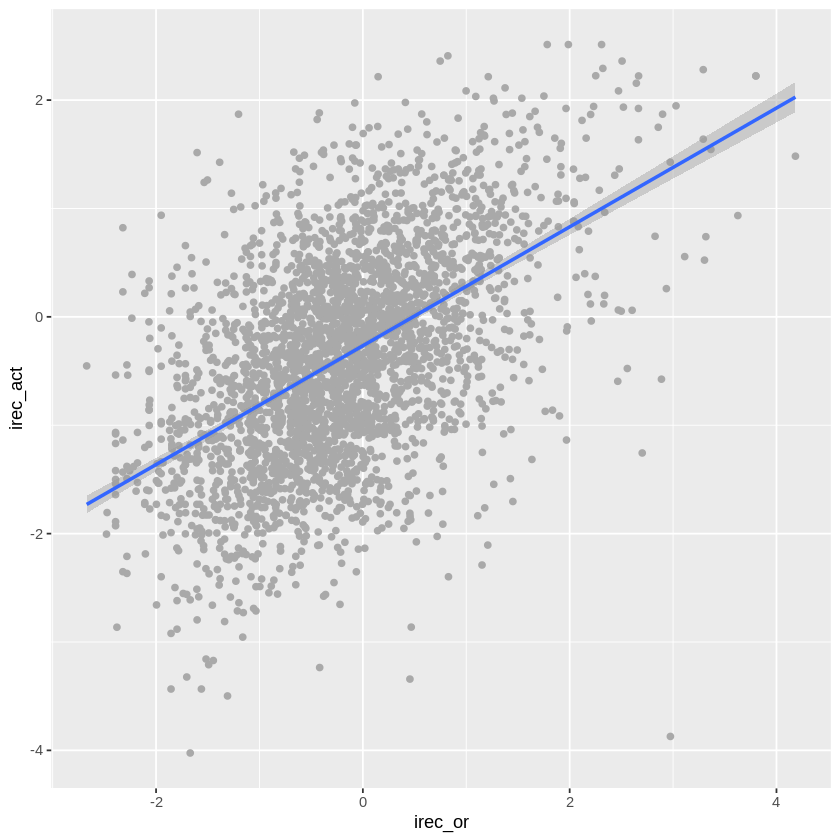

In [ ]:
paste(label(ceey$irec_act),'~',label(ceey$irec_or))
#
m <- svyglm(irec_act ~ irec_or, design = df_d)
summary(m)
ceey %>% ggplot(aes(x=irec_or, y= irec_act)) + geom_point(color="darkgray") +
  stat_smooth(method = "lm", formula = y ~ x, geom = "smooth")

# Nuevo León Aprende

In [ ]:
head(dd)

variable,label,tabla,code,descripcion
<chr>,<chr>,<chr>,<dbl>,<chr>
appart,¿Aceptas participar?,p_efa_23,1,Sí
bicf01,"Antes de ir a la escuela, ¿comes algo?",p_efa_23,1,Nunca
bicf01,"Antes de ir a la escuela, ¿comes algo?",p_efa_23,2,Algunas veces
bicf01,"Antes de ir a la escuela, ¿comes algo?",p_efa_23,3,Casi siempre o siempre
bicf02,"Cuando inicias clases, ¿tienes hambre?",p_efa_23,1,Nunca
bicf02,"Cuando inicias clases, ¿tienes hambre?",p_efa_23,2,Algunas veces
